In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [3]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

In [4]:
image_gen_train.fit(x_train)

In [5]:
x_train_subset1 = np.squeeze(x_train[:12])
x_train_subset2 = x_train[:12]

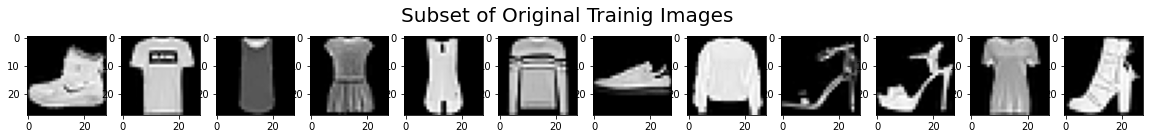

In [6]:
fig = plt.figure(figsize=(20, 2))
plt.set_cmap('gray')

for i in range(0, len(x_train_subset1)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Trainig Images', fontsize=20)
plt.show()

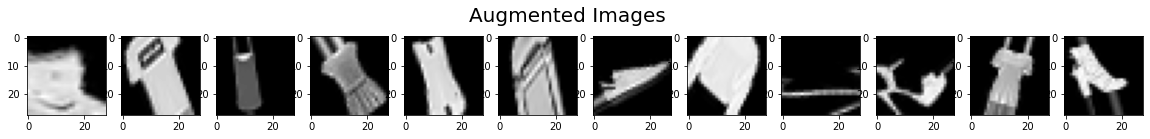

In [7]:
fig = plt.figure(figsize=(20, 2))
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(np.squeeze(x_batch[i]))
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break

In [8]:
import tensorflow as tf
import os

In [9]:
fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [12]:
checkpoint_save_path = './checkpoint/fashion.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model------------')
    model.load_weights(checkpoint_save_path)

-------------load the model------------


In [13]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

In [14]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2086 - sparse_categorical_accuracy: 0.9225 - val_loss: 0.3231 - val_sparse_categorical_accuracy: 0.8906
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2018 - sparse_categorical_accuracy: 0.9245 - val_loss: 0.3471 - val_sparse_categorical_accuracy: 0.8848
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1971 - sparse_categorical_accuracy: 0.9268 - val_loss: 0.3392 - val_sparse_categorical_accuracy: 0.8886
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1930 - sparse_categorical_accuracy: 0.9277 - val_loss: 0.3639 - val_sparse_categorical_accuracy: 0.8814
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1856 - sparse_categorical_accuracy: 0.9313 - val_loss: 0.3347 - val_sparse_categorical_accuracy: 0.8909


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
import tensorflow as tf
import os
import numpy as np

np.set_printoptions(threshold=np.inf)

In [17]:
fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [20]:
checkpoint_save_path = './checkpoint/fashion.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('----------------load the model----------------')
    model.load_weights(checkpoint_save_path)

----------------load the model----------------


In [21]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)

In [22]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, 
                    validation_data=(x_train, y_train), 
                    validation_freq=1, callbacks=[cp_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2029 - sparse_categorical_accuracy: 0.9232 - val_loss: 0.1957 - val_sparse_categorical_accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1985 - sparse_categorical_accuracy: 0.9256 - val_loss: 0.1801 - val_sparse_categorical_accuracy: 0.9333
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1928 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.1761 - val_sparse_categorical_accuracy: 0.9344
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1859 - sparse_categorical_accuracy: 0.9299 - val_loss: 0.1779 - val_sparse_categorical_accuracy: 0.9319
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1820 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.1809 - val_sparse_categorical_accuracy: 0.9317


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_2 (Dense)              (32, 128)                 100480    
_________________________________________________________________
dense_3 (Dense)              (32, 10)                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(model.trainable_variables)

[<tf.Variable 'dense_2/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[ 7.34876096e-01,  6.25849128e-01, -2.25806553e-02,
         3.75586525e-02,  7.48447236e-03,  3.10759414e-02,
         2.63716560e-03, -4.73329395e-01, -1.79432631e-02,
         5.88537335e-01, -6.66267350e-02, -1.88769817e-01,
        -2.05779411e-02,  1.43466949e-01,  6.10357344e-01,
        -1.02812618e-01,  2.32394375e-02, -3.74737829e-01,
         4.62621935e-02, -6.86959624e-02,  6.59422636e-01,
         2.29485482e-02,  1.67375967e-01,  2.36236304e-03,
        -3.56895149e-01,  7.15955555e-01, -3.66271175e-02,
         6.24852553e-02,  5.16930997e-01,  1.57510731e-02,
         1.78945199e-01, -1.42795548e-01, -2.04183772e-01,
        -4.04509068e-01, -1.26596987e-02,  1.27111912e-01,
         3.62722576e-03,  7.01409280e-01,  1.18799545e-02,
         3.82731631e-02, -2.47997925e-01,  3.77145447e-02,
        -2.06115898e-02,  6.46572292e-01,  2.15516135e-01,
        -4.92391251e-02,  6.04856551e-01, -

In [25]:
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()